In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
def summary_table(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [4]:
summary_table(df)

,Name,dtypes,Missing,Uniques
0,age,int64,0,41
1,sex,int64,0,2
2,cp,int64,0,4
3,trestbps,int64,0,49
4,chol,int64,0,152
5,fbs,int64,0,2
6,restecg,int64,0,3
7,thalach,int64,0,91
8,exang,int64,0,2
9,oldpeak,float64,0,40


In [5]:
cat_features = ['cp', 'restecg', 'slope', 'ca', 'thal', 'sex', 'fbs', 'exang']

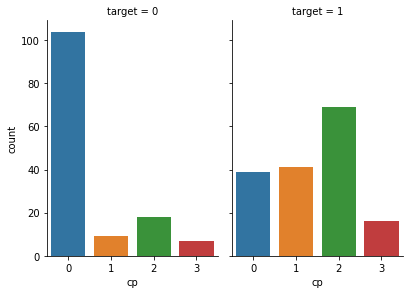

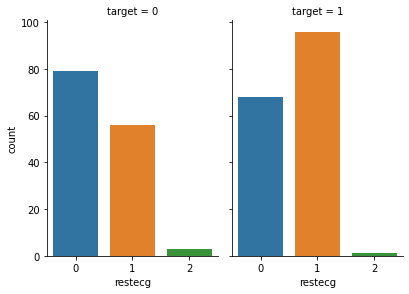

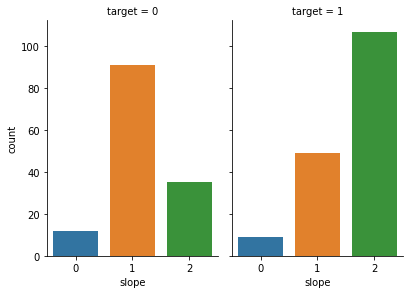

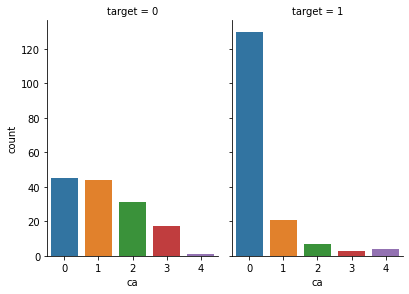

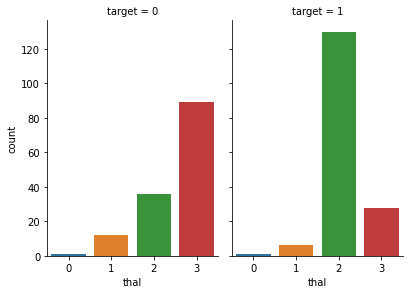

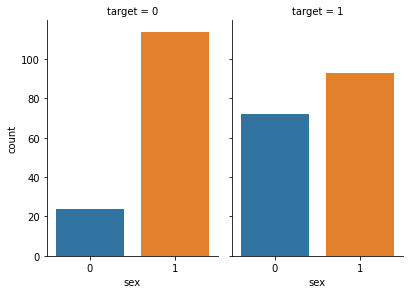

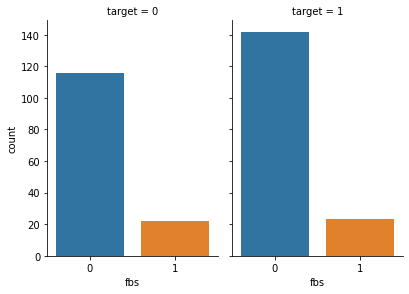

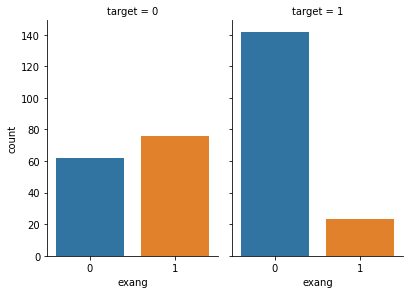

In [6]:
for cat in cat_features:
    g = sns.catplot(x=cat, col="target",
                    data=df, kind="count",
                    height=4, aspect=.7);

<Figure size 1440x576 with 0 Axes>

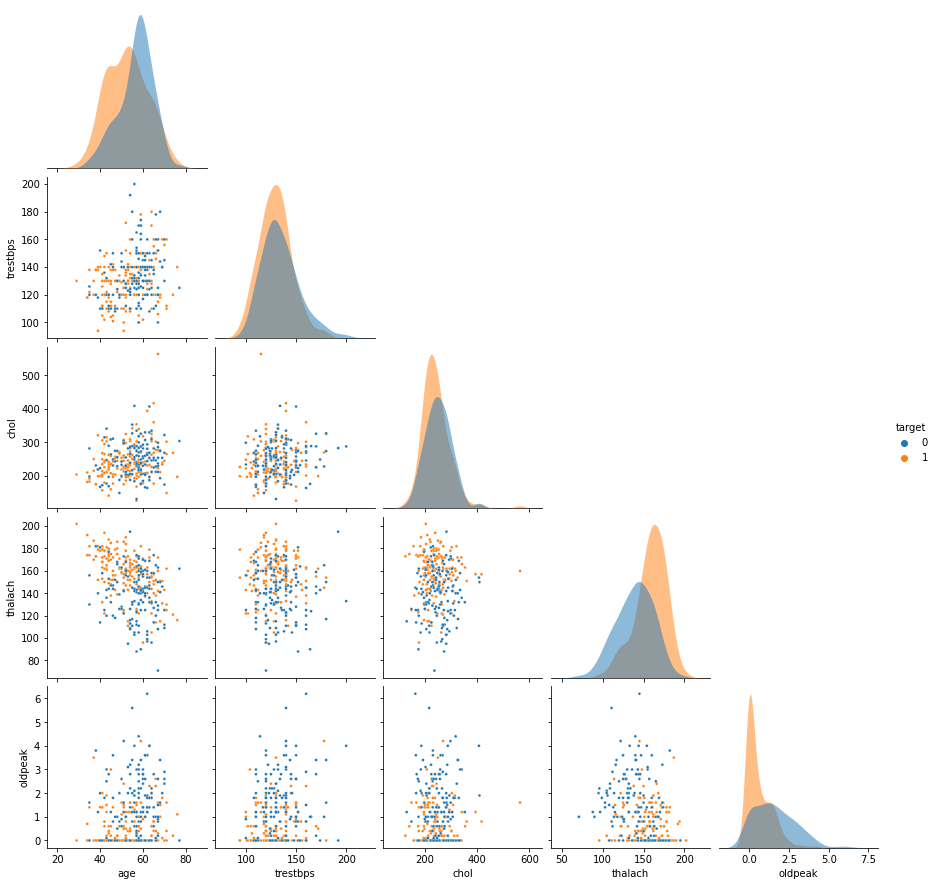

In [7]:
plt.figure(figsize=(20,8));
g = sns.pairplot(df,vars=['age','trestbps','chol','thalach','oldpeak'],hue = 'target',corner=True,
                 plot_kws=dict(s = 8),
                 diag_kws=dict(linewidth=0,alpha=.5));

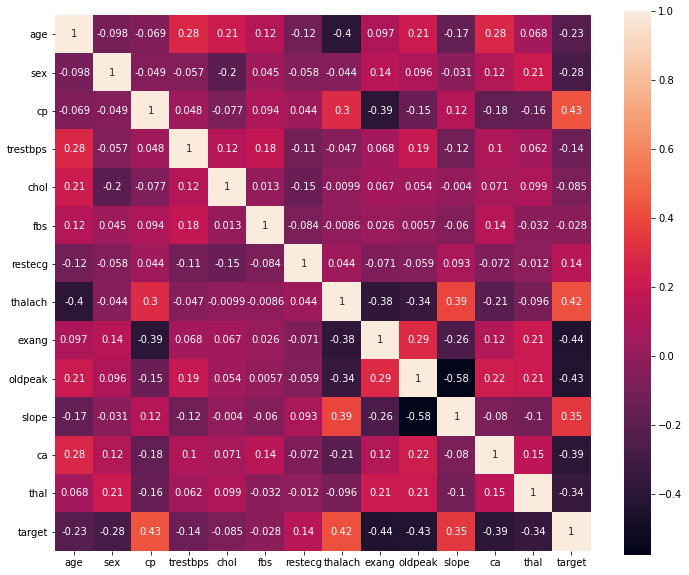

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,square=True)
plt.show()